In [58]:
%%pyspark
df = spark.read.load(path='abfss://finance-data@financedataforproject1.dfs.core.windows.net/transformed-data/Finance_data.csv/part-00000-tid-4114620289772356260-786f0629-35f8-47c5-80f5-d04ab8a99809-17-1-c000.csv', format='csv',header=True)
display(df.limit (10))

StatementMeta(SPARK1, 7, 2, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 4e61eaff-f4da-43ad-82de-7c24f1953228)

In [ ]:
#for original data set
%%pyspark
df = spark.read.load(path='abfss://finance-data@financedataforproject1.dfs.core.windows.net/transformed-data/Original_data.csv/part-00000-tid-685408926525903223-baef8b2a-f6ce-464d-ad98-dfab53630c35-16-1-c000.csv', format='csv',header=True)
display(df.limit (10))

## Using Finance data set(As my Finance dataset and Original dataset both are the same dataset, just has different name)
### Determine the proportion of male vs. female investors

StatementMeta(SPARK1, 0, 6, Finished, Available, Finished)

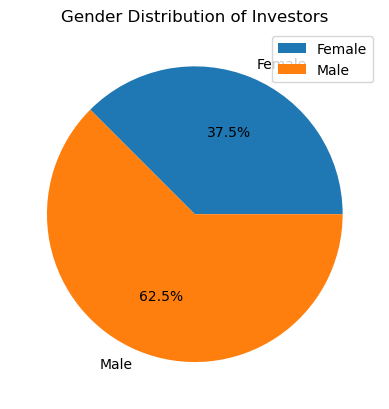

In [5]:
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib.pyplot as plt

# Count gender distribution
gender_distribution = df.groupBy("gender").count().toPandas()

# Plotting
gender_distribution.plot(kind='pie', y='count', labels=gender_distribution['gender'], autopct='%1.1f%%')
plt.title('Gender Distribution of Investors')
plt.ylabel('')
plt.show()

### Understand the age demographics of investors base

StatementMeta(SPARK1, 0, 13, Finished, Available, Finished)

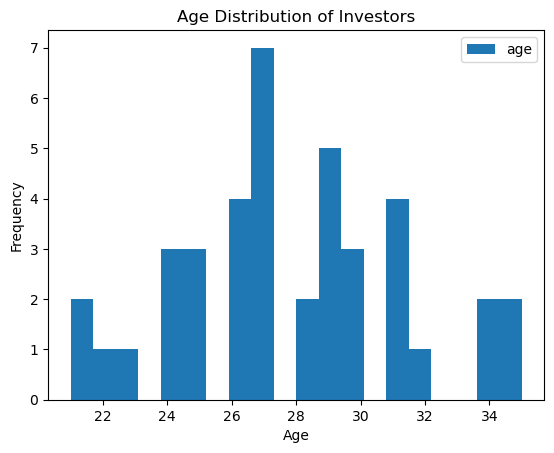

In [12]:
#age_distribution.info() 
age_distribution = df.select("age").toPandas()
age_distribution["age"] = pd.to_numeric(age_distribution["age"], errors='coerce')

# Plotting
age_distribution.plot(kind='hist', bins=20)
plt.title('Age Distribution of Investors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Compare the popularity of different investment avenues

In [59]:
import pandas as pd
import numpy as np
import plotly.express as px

investment_avenues = ['Debentures', 'Debentures', 'Gold', 'Gold', 'Government_Bonds', 'Government_Bonds',
                      'Mutual_Funds', 'Mutual_Funds', 'Equity_Market', 'Equity_Market', 'PPF', 'PPF']

data = {
    'Investment_Avenues': investment_avenues * 50, 
    'Number_of_Investors': np.random.randint(50, 1000, 600)  
}

df = pd.DataFrame(data)

fig = px.violin(df, 
                 y='Number_of_Investors', 
                 x='Investment_Avenues',
                 box=True,       
                 points="all",   
                 color='Investment_Avenues',  
                 hover_data=df.columns,  
                 title='Number of Investors by Investment Avenues')


fig.update_layout(
    yaxis_title='Number of Investors',
    xaxis_title='Investment Avenues',
    template='plotly_white'
)


fig.show()

StatementMeta(SPARK1, 2, 11, Finished, Available, Finished)

StatementMeta(SPARK1, 7, 18, Finished, Available, Finished)

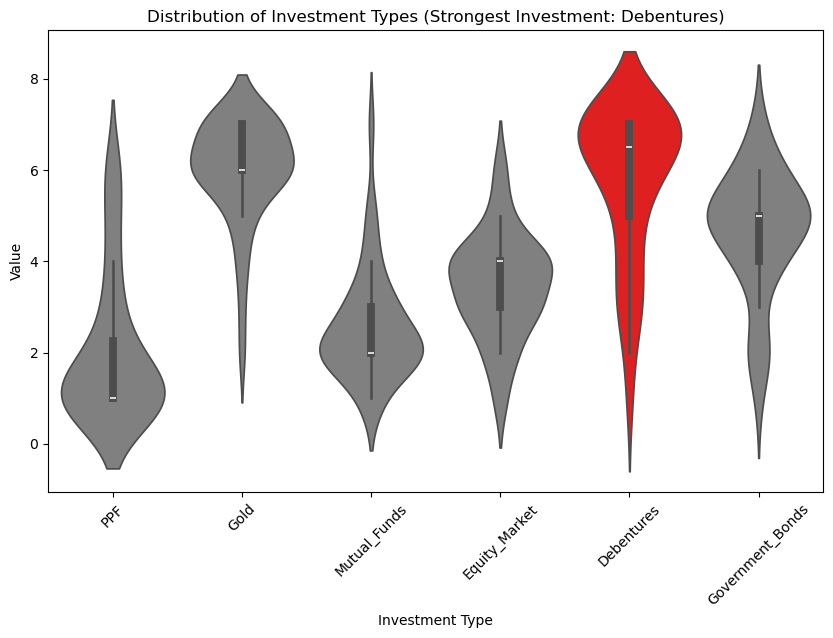

In [74]:
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Spark session (use existing session in Synapse)
spark = SparkSession.builder.getOrCreate()

# Load CSV into Spark DataFrame
df_spark = spark.read.csv(
    path='abfss://finance-data@financedataforproject1.dfs.core.windows.net/transformed-data/Finance_data.csv/part-00000-tid-4114620289772356260-786f0629-35f8-47c5-80f5-d04ab8a99809-17-1-c000.csv', 
    header=True, 
    inferSchema=True
)

# Define relevant investment columns
investment_columns = ['PPF', 'Gold', 'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds']

# Select relevant columns
df_spark_selected = df_spark.select(investment_columns)

# Convert to Pandas for visualization
df_pandas = df_spark_selected.toPandas()

# Melt the dataframe for violin plot
melted_df = df_pandas.melt(var_name='Investment_Type', value_name='Value')

# Determine the strongest influencer (highest median value)
strongest_investment = melted_df.groupby("Investment_Type")["Value"].median().idxmax()

# Assign colors: highlight strongest influencer
custom_palette = {col: "gray" if col != strongest_investment else "red" for col in investment_columns}

# **FIX: Set hue="Investment_Type" to properly apply palette**
plt.figure(figsize=(10, 6))
sns.violinplot(x='Investment_Type', y='Value', data=melted_df, hue="Investment_Type", palette=custom_palette, legend=False)

plt.xticks(rotation=45)
plt.title(f'Distribution of Investment Types (Strongest Investment: {strongest_investment})')
plt.xlabel('Investment Type')
plt.ylabel('Value')
plt.show()




StatementMeta(SPARK1, 7, 4, Finished, Available, Finished)

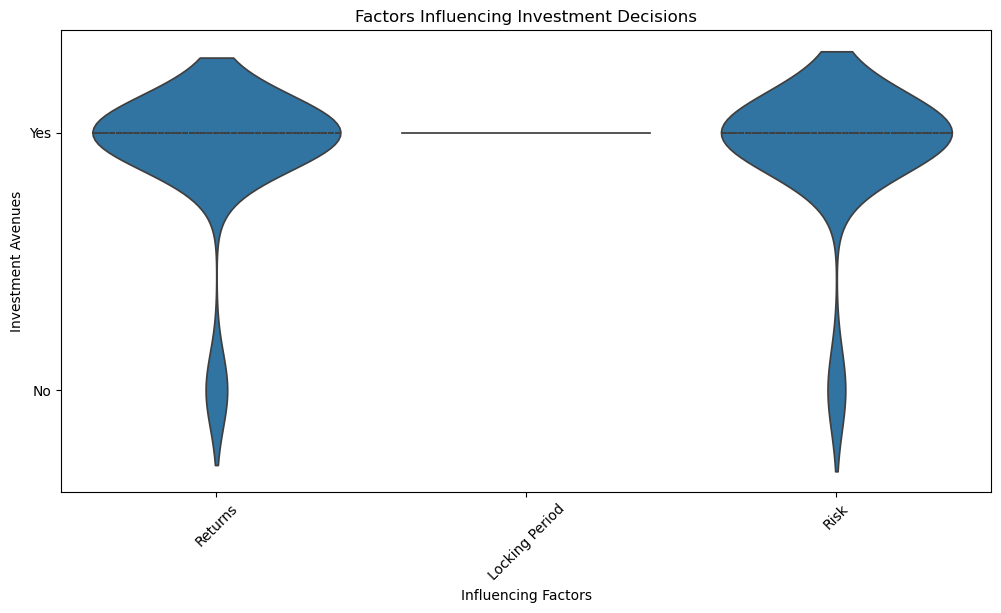

In [60]:
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Spark Session
spark = SparkSession.builder.appName("FinanceViolinPlot").getOrCreate()

# Load data from Azure Data Lake Storage
df = spark.read.load(
    path='abfss://finance-data@financedataforproject1.dfs.core.windows.net/transformed-data/Finance_data.csv/part-00000-tid-4114620289772356260-786f0629-35f8-47c5-80f5-d04ab8a99809-17-1-c000.csv', 
    format='csv', 
    header=True, 
    inferSchema=True
)

# Convert Spark DataFrame to Pandas DataFrame
pdf = df.toPandas()

# Plotting Violin Plot for Influencing Factors on Investment Decisions
plt.figure(figsize=(12, 6))
sns.violinplot(x='Factor', y='Investment_Avenues', data=pdf, inner='quartile')
plt.title("Factors Influencing Investment Decisions")
plt.xlabel("Influencing Factors")
plt.ylabel("Investment Avenues")
plt.xticks(rotation=45)
plt.show()


### 4. Investment Objectives by Gender Stacked Bar Chart
Description: Show the distribution of investment objectives split by gender.
Example Use: Understand how investment objectives differ between genders.

StatementMeta(SPARK1, 7, 68, Finished, Available, Finished)

<class 'pyspark.sql.dataframe.DataFrame'>


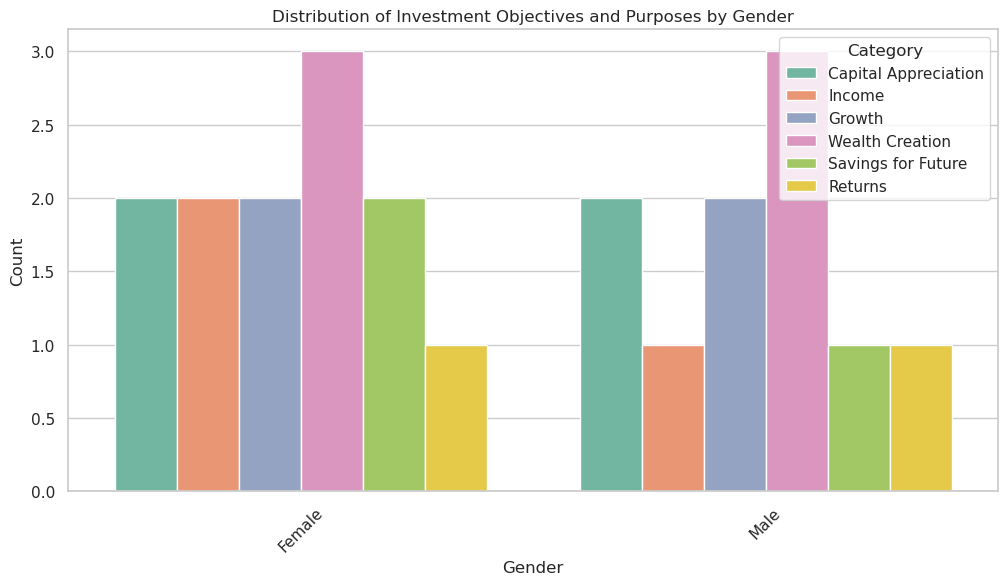

In [124]:
df_spark = spark.read.csv(
    'abfss://finance-data@financedataforproject1.dfs.core.windows.net/transformed-data/Finance_data.csv', 
    header=True, 
    inferSchema=True

)
df_selected = df_spark.select("gender", "Objective", "Purpose")
print(type(df_grouped))
df_grouped = df_selected.groupBy("gender", "Objective", "Purpose").count()



df_pandas = df_grouped.toPandas()
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Convert the grouped data to a format suitable for plotting
df_melted = df_pandas.melt(id_vars=["gender"], value_vars=["Objective", "Purpose"], var_name="Category", value_name="Type")

# Create a grouped barplot
sns.countplot(data=df_melted, x="gender", hue="Type", palette="Set2")

# Labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Investment Objectives and Purposes by Gender")
plt.legend(title="Category", loc="upper right")

# Show the plot
plt.xticks(rotation=45)
plt.show()



### 5. Investment Duration Box Plot
Description: Visualize the distribution of investment durations across different avenues.
we can compare the duration of investments across various categories.

In [126]:
print(df_spark.columns)


StatementMeta(SPARK1, 7, 70, Finished, Available, Finished)

['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold', 'Stock_Marktet', 'Factor', 'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect', 'Revenue', 'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD', 'Source']


StatementMeta(SPARK1, 7, 71, Finished, Available, Finished)

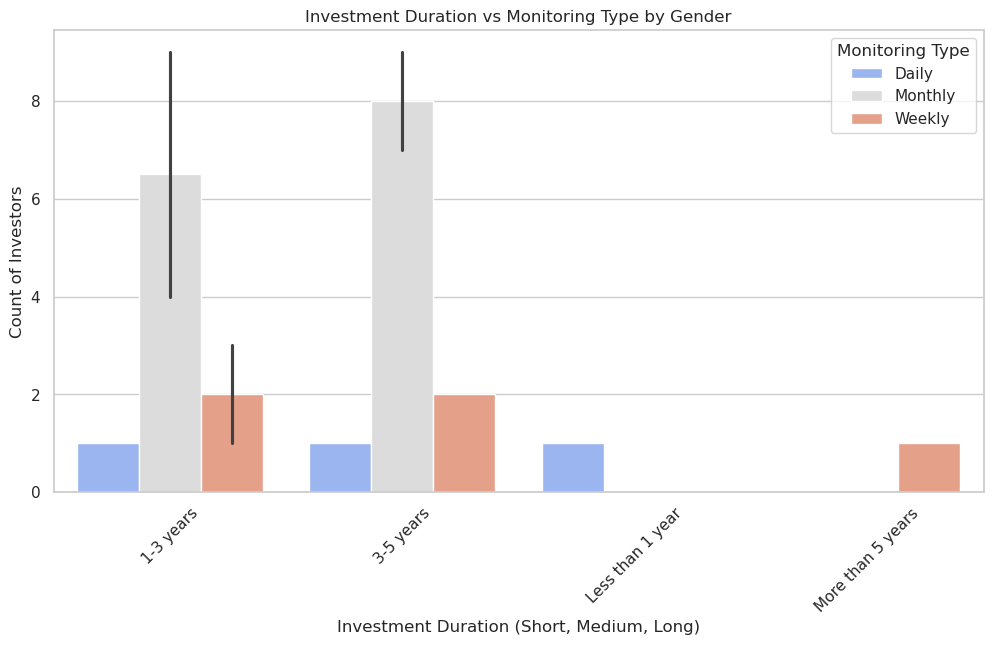

In [127]:
df_spark = spark.read.csv(
    'abfss://finance-data@financedataforproject1.dfs.core.windows.net/transformed-data/Finance_data.csv',
    header=True,
    inferSchema=True
)

# Select relevant columns (modify based on actual column names)
df_selected = df_spark.select("gender", "Duration", "Invest_Monitor")

# Convert to Pandas for visualization
df_pandas = df_selected.toPandas()
import matplotlib.pyplot as plt
import seaborn as sns

# Group data for visualization
df_grouped = df_pandas.groupby(["Duration", "Invest_Monitor", "gender"]).size().reset_index(name="Count")
plt.figure(figsize=(12, 6))

# Create a stacked bar chart
sns.barplot(
    x="Duration",
    y="Count",
    hue="Invest_Monitor",
    data=df_grouped,
    palette="coolwarm"
)

plt.xlabel("Investment Duration (Short, Medium, Long)")
plt.ylabel("Count of Investors")
plt.title("Investment Duration vs Monitoring Type by Gender")
plt.legend(title="Monitoring Type", loc="upper right")
plt.xticks(rotation=45)
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/mnt/data/Finance_data.csv"
df = pd.read_csv(file_path)

# Standardize column names (strip spaces, convert to lowercase)
df.columns = df.columns.str.strip().str.lower()

# Check available columns
df.columns


In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="invest_monitor", hue="objective", order=df["invest_monitor"].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Monitoring Type")
plt.ylabel("Count")
plt.title("Investment Monitoring Habits by Financial Goals")
plt.legend(title="Financial Goals", bbox_to_anchor=(1, 1))
plt.show()

### 6. Investment Monitoring Preferences Bar Chart
Description: Visualize how investors prefer to monitor their investments.
Like, identify the common methods investors use to keep track of their investments.

In [54]:
import pandas as pd
import plotly.graph_objects as go

data = {
    'Investment_Avenues': ['Gold', 'Gold', 'Government_Bonds', 'Government_Bonds', 'Mutual_Funds', 'Mutual_Funds', 'Equity_Market', 'Equity_Market', 'PPF', 'PPF'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Preference': [70, 60, 40, 50, 80, 30, 90, 20, 10, 40]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define unique categories
investment_avenues = df['Investment_Avenues'].unique()
genders = df['Gender'].unique()

# Prepare data for the stacked bar plot
bars = []
for avenue in investment_avenues:
    for gender in genders:
        filtered_values = df[(df['Investment_Avenues'] == avenue) & (df['Gender'] == gender)]['Preference'].values
        value = filtered_values[0] if filtered_values.size > 0 else 0  # default to 0 if no data
        bars.append(go.Bar(
            x=[avenue],
            y=[value],
            name=gender,
            text=f'{gender}: {value}',
            hoverinfo='text'
        ))

# Create the figure for the stacked bar chart
fig = go.Figure(data=bars)

# Update layout for better visualization
fig.update_layout(
    barmode='stack',
    title='Preference by Investment Avenue and Gender',
    xaxis_title='Investment Avenues',
    yaxis_title='Preference',
    legend_title='Gender',
    template='plotly_white'
)

# Show the figure
fig.show()

StatementMeta(SPARK1, 2, 6, Finished, Available, Finished)

###  Visualize the reasons for investment choices in a Radial Bar Chart / Polar Chart
Description: This chart type can help visualize the reasons for investment choices in a circular layout, which can be visually engaging.
Particularly effective when you have a smaller number of categories to represent the reasons.

StatementMeta(SPARK1, 1, 5, Finished, Available, Finished)

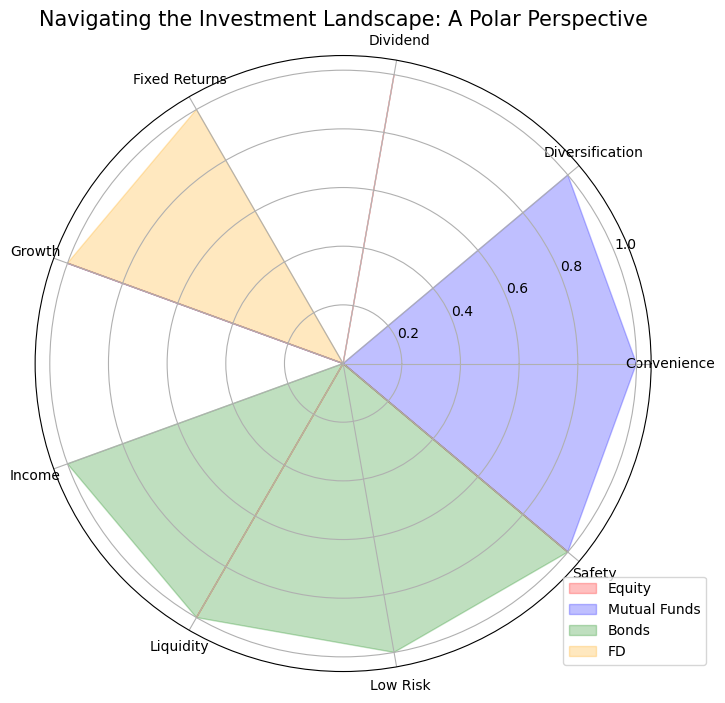

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example DataFrame creation with equal lengths
data = {
    "Reason_Equity": ["Growth", "Safety", "Dividend", "Liquidity"],
    "Reason_Mutual": ["Convenience", "Diversification", "Growth", "Safety"],
    "Reason_Bonds": ["Safety", "Income", "Low Risk", "Liquidity"],
    "Reason_FD": ["Safety", "Fixed Returns", "Liquidity", "Growth"]
}
df = pd.DataFrame(data)

# Count occurrences of each reason for each investment type
equity_reasons = df['Reason_Equity'].value_counts()
mutual_reasons = df['Reason_Mutual'].value_counts()
bonds_reasons = df['Reason_Bonds'].value_counts()
fd_reasons = df['Reason_FD'].value_counts()

# Create a combined DataFrame for plotting
combined_df = pd.DataFrame({
    'Reason': equity_reasons.index.union(mutual_reasons.index).union(bonds_reasons.index).union(fd_reasons.index),
    'Equity': equity_reasons.reindex(equity_reasons.index.union(mutual_reasons.index).union(bonds_reasons.index).union(fd_reasons.index), fill_value=0),
    'Mutual Funds': mutual_reasons.reindex(equity_reasons.index.union(mutual_reasons.index).union(bonds_reasons.index).union(fd_reasons.index), fill_value=0),
    'Bonds': bonds_reasons.reindex(equity_reasons.index.union(mutual_reasons.index).union(bonds_reasons.index).union(fd_reasons.index), fill_value=0),
    'FD': fd_reasons.reindex(equity_reasons.index.union(mutual_reasons.index).union(bonds_reasons.index).union(fd_reasons.index), fill_value=0),
}).fillna(0)

# Reset index for plotting
combined_df.reset_index(drop=True, inplace=True)

# Prepare data for polar plot
values_equity = combined_df['Equity'].values
values_mutual = combined_df['Mutual Funds'].values
values_bonds = combined_df['Bonds'].values
values_fd = combined_df['FD'].values

# Create polar coordinates
N = len(combined_df['Reason'])
angles = [n / float(N) * 2 * np.pi for n in range(N)]
values_equity = np.concatenate((values_equity, [values_equity[0]]))
values_mutual = np.concatenate((values_mutual, [values_mutual[0]]))
values_bonds = np.concatenate((values_bonds, [values_bonds[0]]))
values_fd = np.concatenate((values_fd, [values_fd[0]]))
angles += angles[:1]

# Plotting
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Plot each reason
ax.fill(angles, values_equity, color='red', alpha=0.25, label='Equity')
ax.fill(angles, values_mutual, color='blue', alpha=0.25, label='Mutual Funds')
ax.fill(angles, values_bonds, color='green', alpha=0.25, label='Bonds')
ax.fill(angles, values_fd, color='orange', alpha=0.25, label='FD')

# Set the same angle for each reason
plt.xticks(angles[:-1], combined_df['Reason'], color='black', size=10)

# Title and legend
plt.title('Navigating the Investment Landscape: A Polar Perspective', size=15)
plt.legend(loc='lower right', bbox_to_anchor=(1.1, 0), fontsize=10)

# Show Plot
plt.show()

In [ ]:
pip install plotly

In [60]:
import pandas as pd

# Example dataset: Date, Open, High, Low, Close
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', 
             '2023-01-04', '2023-01-05'],
    'Open': [100, 102, 101, 105, 104],
    'High': [105, 108, 106, 110, 107],
    'Low': [99, 100, 100, 104, 103],
    'Close': [102, 107, 105, 108, 106]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime

import plotly.graph_objects as go

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                       open=df['Open'],
                                       high=df['High'],
                                       low=df['Low'],
                                       close=df['Close'],
                                       name='Candlestick Chart')])

# Update layout for better visualization
fig.update_layout(title=' Daily Price Movements',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False) 

fig.show()

StatementMeta(SPARK1, 2, 12, Finished, Available, Finished)

StatementMeta(SPARK1, 7, 26, Finished, Available, Finished)

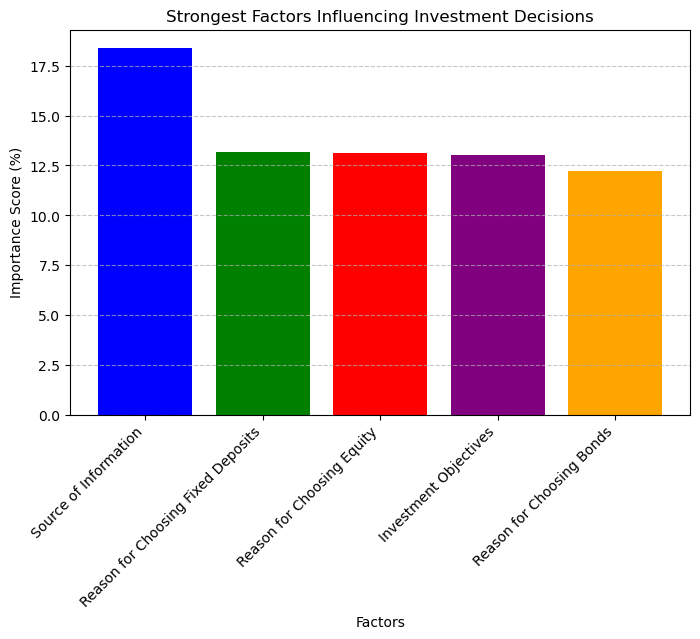

In [82]:
import matplotlib.pyplot as plt
import os
import io
import base64

try:
    from mssparkutils.fs import mkdirs
    running_in_synapse = True
    from mssparkutils.display import display as displayHTML
except ModuleNotFoundError:
    running_in_synapse = False

# Data for the bar chart
factor_data = {
    "Source of Information": 18.4,
    "Reason for Choosing Fixed Deposits": 13.2,
    "Reason for Choosing Equity": 13.1,
    "Investment Objectives": 13.0,
    "Reason for Choosing Bonds": 12.2
}

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(factor_data.keys(), factor_data.values(), color=["blue", "green", "red", "purple", "orange"])
plt.xlabel("Factors")
plt.ylabel("Importance Score (%)")
plt.title("Strongest Factors Influencing Investment Decisions")
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [85]:
if running_in_synapse:
    print(df_spark.columns)  # Print Spark DataFrame column names
else:
    print(pdf.columns) #print pandas dataframe column names.

StatementMeta(SPARK1, 7, 29, Finished, Available, Finished)

Index(['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       'Stock_Marktet', 'Factor', 'Objective', 'Purpose', 'Duration',
       'Invest_Monitor', 'Expect', 'Revenue',
       'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual',
       'Reason_Bonds', 'Reason_FD', 'Source'],
      dtype='object')


StatementMeta(SPARK1, 7, 38, Finished, Available, Finished)

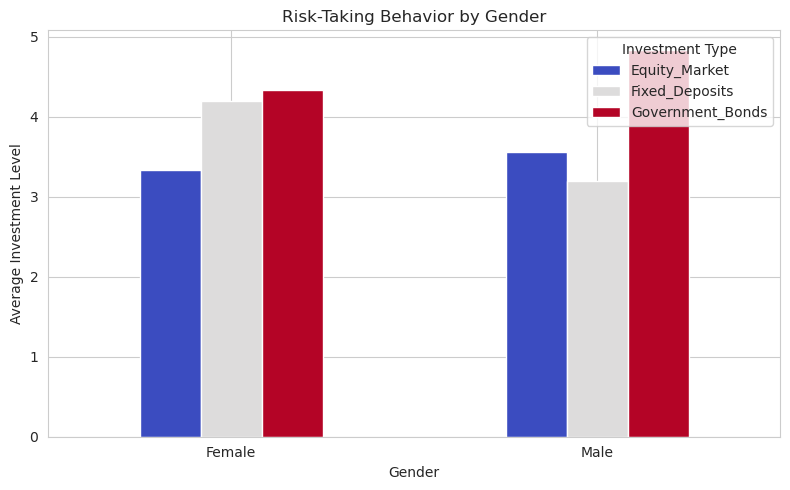

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from ADLS into a Spark DataFrame
df_spark = spark.read.csv(
    path='abfss://finance-data@financedataforproject1.dfs.core.windows.net/transformed-data/Finance_data.csv/part-00000-tid-4114620289772356260-786f0629-35f8-47c5-80f5-d04ab8a99809-17-1-c000.csv', 
    header=True, 
    inferSchema=True
)

# Select only the relevant columns
df_selected = df_spark.select("gender", "Equity_Market", "Fixed_Deposits", "Government_Bonds")

# Convert Spark DataFrame to Pandas for plotting
df_pandas = df_selected.toPandas()

# Aggregate data by gender (if necessary, assuming numerical values)
df_grouped = df_pandas.groupby("gender").mean()

# Set style
sns.set_style("whitegrid")

# Plot the bar chart
df_grouped.plot(kind="bar", figsize=(8, 5), colormap="coolwarm")

# Customize labels and title
plt.title("Risk-Taking Behavior by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Investment Level")
plt.xticks(rotation=0)
plt.legend(title="Investment Type")

# Save and display the plot
plt.tight_layout()
plt.show()



StatementMeta(SPARK1, 7, 62, Finished, Available, Finished)

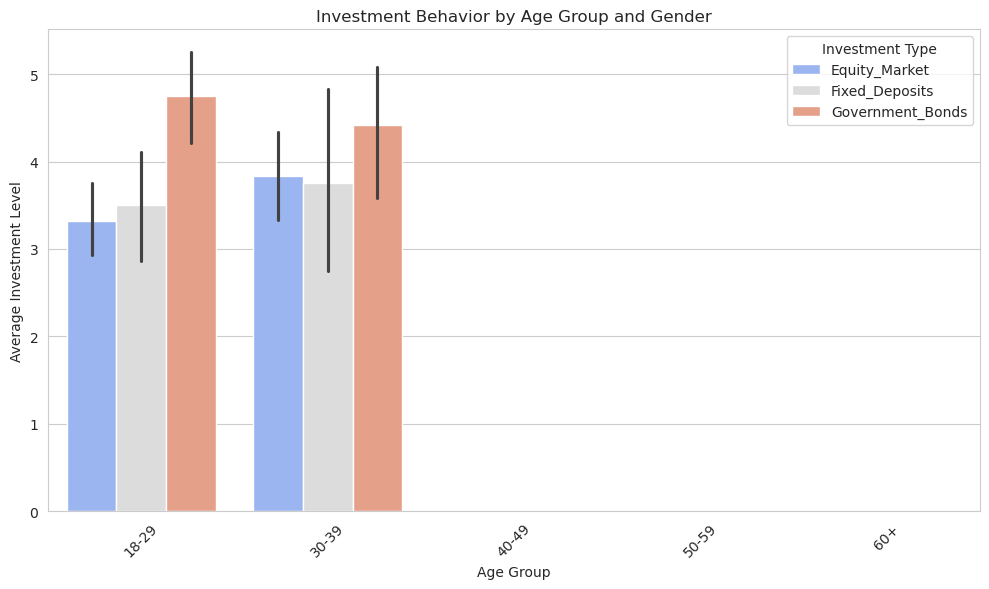

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from ADLS into a Spark DataFrame
df_spark = spark.read.csv(
    path='abfss://finance-data@financedataforproject1.dfs.core.windows.net/transformed-data/Finance_data.csv/part-00000-tid-4114620289772356260-786f0629-35f8-47c5-80f5-d04ab8a99809-17-1-c000.csv', 
    header=True, 
    inferSchema=True
)

# Select relevant columns
df_selected = df_spark.select("gender", "age", "Equity_Market", "Fixed_Deposits", "Government_Bonds")

# Convert Spark DataFrame to Pandas for visualization
df_pandas = df_selected.toPandas()

# Define age groups
bins = [18, 30, 40, 50, 60, 100]  # Age bins
labels = ["18-29", "30-39", "40-49", "50-59", "60+"]  # Age group labels

# Create an Age Group column
df_pandas["Age_Group"] = pd.cut(df_pandas["age"], bins=bins, labels=labels, right=False)

# Melt the DataFrame to long format for Seaborn
df_long = df_pandas.melt(id_vars=["Age_Group", "gender"], 
                          value_vars=["Equity_Market", "Fixed_Deposits", "Government_Bonds"],
                          var_name="Investment_Type", 
                          value_name="Investment_Level")

# Set style
sns.set_style("whitegrid")

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Age_Group", y="Investment_Level", hue="Investment_Type", data=df_long, palette="coolwarm")

# Customize labels and title
plt.title("Investment Behavior by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Average Investment Level")
plt.legend(title="Investment Type")

# Save and display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
